# Loan Defaulter Detection

### A. Import dependencies

In [26]:
import pandas as pd
from matplotlib import pyplot
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### B. Import / Explore the Dataset
Ensure that you have the Loan_Default.csv in the root directory for this, the link to the Kaggle site can be found in the README file.

In [27]:
df = pd.read_csv("Loan_Default.csv")

# Let's take a look at the first 5 rows
df.head()

,Unnamed: 0,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,...,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type
0,0,24890.0,2019.0,116500.0,4.201667,0.972767,3405.226667,360.0,118000.000000,1740.0,...,sb,pr,home,1U,EXP,CIB,25-34,to_inst,south,direct
1,1,24891.0,2019.0,206500.0,3.996667,0.677800,558.893333,360.0,281333.333333,4980.0,...,sb,pr,home,1U,EQUI,EXP,55-64,to_inst,North,direct
2,2,24892.0,2019.0,406500.0,4.560000,0.200000,595.000000,360.0,508000.000000,9480.0,...,sb,pr,home,1U,EXP,CIB,35-44,to_inst,south,direct
3,3,24893.0,2019.0,456500.0,4.250000,0.681000,124.500000,360.0,658000.000000,11880.0,...,sb,pr,home,1U,EXP,CIB,45-54,not_inst,North,direct
4,4,24894.0,2019.0,696500.0,4.000000,0.304200,0.000000,360.0,758000.000000,10440.0,...,sb,pr,home,1U,CRIF,EXP,25-34,not_inst,North,direct


### C. Data Cleaning / Preparation

In [28]:
df.columns = df.columns.str.lower()

Look at the column breakdown for the dataset first, to see what we may be dealing with

In [29]:
# Reveals column information, such as number of rows that are not null, and the data type held
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   unnamed: 0                 148670 non-null  int64  
 1   id                         148670 non-null  float64
 2   year                       148670 non-null  float64
 3   loan_amount                148670 non-null  float64
 4   rate_of_interest           148670 non-null  float64
 5   interest_rate_spread       148670 non-null  float64
 6   upfront_charges            148670 non-null  float64
 7   term                       148670 non-null  float64
 8   property_value             148670 non-null  float64
 9   income                     148670 non-null  float64
 10  credit_score               148670 non-null  float64
 11  ltv                        148670 non-null  float64
 12  status                     148670 non-null  float64
 13  dtir1                      14

from here, we can see that many of the columns are not completely filled with non-null values. We can drop those rows since training any model using them will cause incomplete data to be used, which can negatively affect results.

*We cannot remove the rate of interest, interest_rate_spread, upfront_charges row in the end as it removes majority of status = 1*

In [30]:
no_na_df = df.dropna(subset=df.columns.difference(['rate_of_interest','interest_rate_spread','upfront_charges']))

# All columns in this new dataframe should have the same number of non-null rows
no_na_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   unnamed: 0                 148670 non-null  int64  
 1   id                         148670 non-null  float64
 2   year                       148670 non-null  float64
 3   loan_amount                148670 non-null  float64
 4   rate_of_interest           148670 non-null  float64
 5   interest_rate_spread       148670 non-null  float64
 6   upfront_charges            148670 non-null  float64
 7   term                       148670 non-null  float64
 8   property_value             148670 non-null  float64
 9   income                     148670 non-null  float64
 10  credit_score               148670 non-null  float64
 11  ltv                        148670 non-null  float64
 12  status                     148670 non-null  float64
 13  dtir1                      14

View the 1st 5 rows again (just to revisit the data)

In [31]:
no_na_df.head()

,unnamed: 0,id,year,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,property_value,income,...,construction_type,occupancy_type,secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,region,security_type
0,0,24890.0,2019.0,116500.0,4.201667,0.972767,3405.226667,360.0,118000.000000,1740.0,...,sb,pr,home,1U,EXP,CIB,25-34,to_inst,south,direct
1,1,24891.0,2019.0,206500.0,3.996667,0.677800,558.893333,360.0,281333.333333,4980.0,...,sb,pr,home,1U,EQUI,EXP,55-64,to_inst,North,direct
2,2,24892.0,2019.0,406500.0,4.560000,0.200000,595.000000,360.0,508000.000000,9480.0,...,sb,pr,home,1U,EXP,CIB,35-44,to_inst,south,direct
3,3,24893.0,2019.0,456500.0,4.250000,0.681000,124.500000,360.0,658000.000000,11880.0,...,sb,pr,home,1U,EXP,CIB,45-54,not_inst,North,direct
4,4,24894.0,2019.0,696500.0,4.000000,0.304200,0.000000,360.0,758000.000000,10440.0,...,sb,pr,home,1U,CRIF,EXP,25-34,not_inst,North,direct


In [32]:
no_na_df.status.value_counts()

status
0.0    112031
1.0     36639
Name: count, dtype: int64

Before visualizing anything, we can first 1-hot encode the data. This converts categorical values into numerical values, to provide standardization such that ML models can work with the data.

The columns that are categorical are:
1. loan_limit
2. gender
3. approv_in_adv
4. loan_type
5. loan_purpose
6. Credit_Worthiness
7. open_credit
8. business_or_commercial
9. neg_ammortization
10. Lump_sum_payment
11. Construction_type
12. Occupancy_type
13. Secured_by
14. Total_units
15. credit_type
16. Co-applicant_credit_type
17. Age
18. Submission_of_application
19. Region
20. Security_type

In [33]:
columns_to_encode = [
    'loan_limit',
    'gender',
    'approv_in_adv',
    'loan_type',
    'loan_purpose',
    'credit_worthiness',
    'open_credit',
    'business_or_commercial',
    'neg_ammortization',
    'lump_sum_payment',
    'construction_type',
    'occupancy_type',
    'secured_by',
    'total_units',
    'credit_type',
    'co-applicant_credit_type',
    'age',
    'submission_of_application',
    'region',
    'security_type',
]

# Perform the encoding and view the new df
one_hot_encoded_df = pd.get_dummies(no_na_df, columns=columns_to_encode)
one_hot_encoded_df.head()

,unnamed: 0,id,year,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,property_value,income,...,age_<25,age_>74,submission_of_application_not_inst,submission_of_application_to_inst,region_North,region_North-East,region_central,region_south,security_type_Indriect,security_type_direct
0,0,24890.0,2019.0,116500.0,4.201667,0.972767,3405.226667,360.0,118000.000000,1740.0,...,False,False,False,True,False,False,False,True,False,True
1,1,24891.0,2019.0,206500.0,3.996667,0.677800,558.893333,360.0,281333.333333,4980.0,...,False,False,False,True,True,False,False,False,False,True
2,2,24892.0,2019.0,406500.0,4.560000,0.200000,595.000000,360.0,508000.000000,9480.0,...,False,False,False,True,False,False,False,True,False,True
3,3,24893.0,2019.0,456500.0,4.250000,0.681000,124.500000,360.0,658000.000000,11880.0,...,False,False,True,False,True,False,False,False,False,True
4,4,24894.0,2019.0,696500.0,4.000000,0.304200,0.000000,360.0,758000.000000,10440.0,...,False,False,True,False,True,False,False,False,False,True


In [34]:
one_hot_encoded_df.columns = one_hot_encoded_df.columns.str.lower()

Important Columns

In [35]:
impt_cols = ['dtir1', 'loan_amount', 'loan_type_type1', 'loan_type_type2', 'loan_type_type3', 'credit_worthiness_l1', 'credit_worthiness_l2', 'credit_score', 'income', 'rate_of_interest']

impt_cols_with_no_encoding = ['loan_amount', 'loan_type', 'credit_worthiness', 'rate_of_interest', 'income','credit_score','dtir1', 'status']

In [36]:
impt_df = one_hot_encoded_df[impt_cols]

In [37]:
impt_df.head()

,dtir1,loan_amount,loan_type_type1,loan_type_type2,loan_type_type3,credit_worthiness_l1,credit_worthiness_l2,credit_score,income,rate_of_interest
0,45.000000,116500.0,True,False,False,True,False,758.0,1740.0,4.201667
1,36.333333,206500.0,False,True,False,True,False,552.0,4980.0,3.996667
2,46.000000,406500.0,True,False,False,True,False,834.0,9480.0,4.560000
3,42.000000,456500.0,True,False,False,True,False,587.0,11880.0,4.250000
4,39.000000,696500.0,True,False,False,True,False,602.0,10440.0,4.000000


## D. EDA

A statistical summary of the features

In [38]:
no_na_df.describe()

,unnamed: 0,id,year,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,property_value,income,credit_score,ltv,status,dtir1
count,148670.000000,148670.000000,148670.0,1.486700e+05,148670.000000,148670.000000,148670.000000,148670.000000,1.486700e+05,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000
mean,74334.500000,99224.500000,2019.0,3.311177e+05,4.028634,0.440776,3117.482265,335.129717,4.936154e+05,6952.422412,699.789103,73.273993,0.246445,37.933114
std,42917.476598,42917.476598,0.0,1.839093e+05,0.525193,0.492539,2966.166712,58.407773,3.557329e+05,6383.046255,115.875857,39.792589,0.430942,10.061503
min,0.000000,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,37167.250000,62057.250000,2019.0,1.965000e+05,3.625000,0.091500,910.550000,360.000000,2.680000e+05,3780.000000,599.000000,62.152778,0.000000,32.000000
50%,74334.500000,99224.500000,2019.0,2.965000e+05,3.990000,0.393400,2582.518333,360.000000,4.180000e+05,5760.000000,699.000000,75.519474,0.000000,39.000000
75%,111501.750000,136391.750000,2019.0,4.365000e+05,4.375000,0.758700,4444.562500,360.000000,6.180000e+05,8520.000000,800.000000,86.139456,0.000000,45.000000
max,148669.000000,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


Looking at the correlation between features, we can see that these features are highly related.
- rate_of_interest & interest_rate_spread
- loan_amount & property_value
- income & loan_amount 

<Axes: >

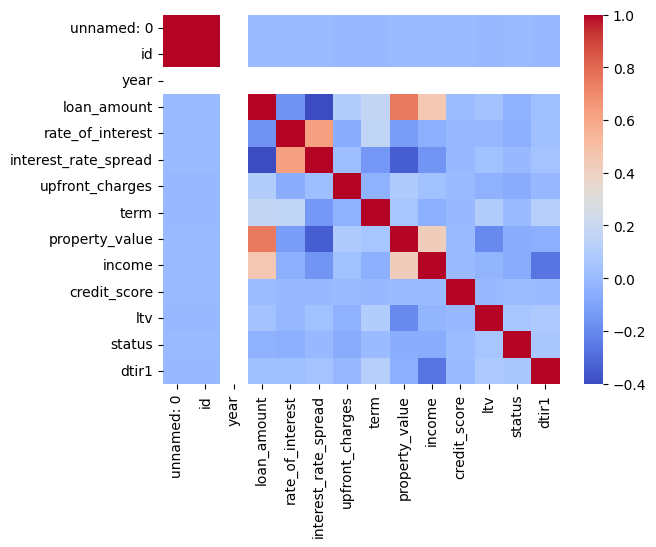

In [50]:
sns.heatmap(data=no_na_df.corr(numeric_only=True), annot=False, cmap='coolwarm')

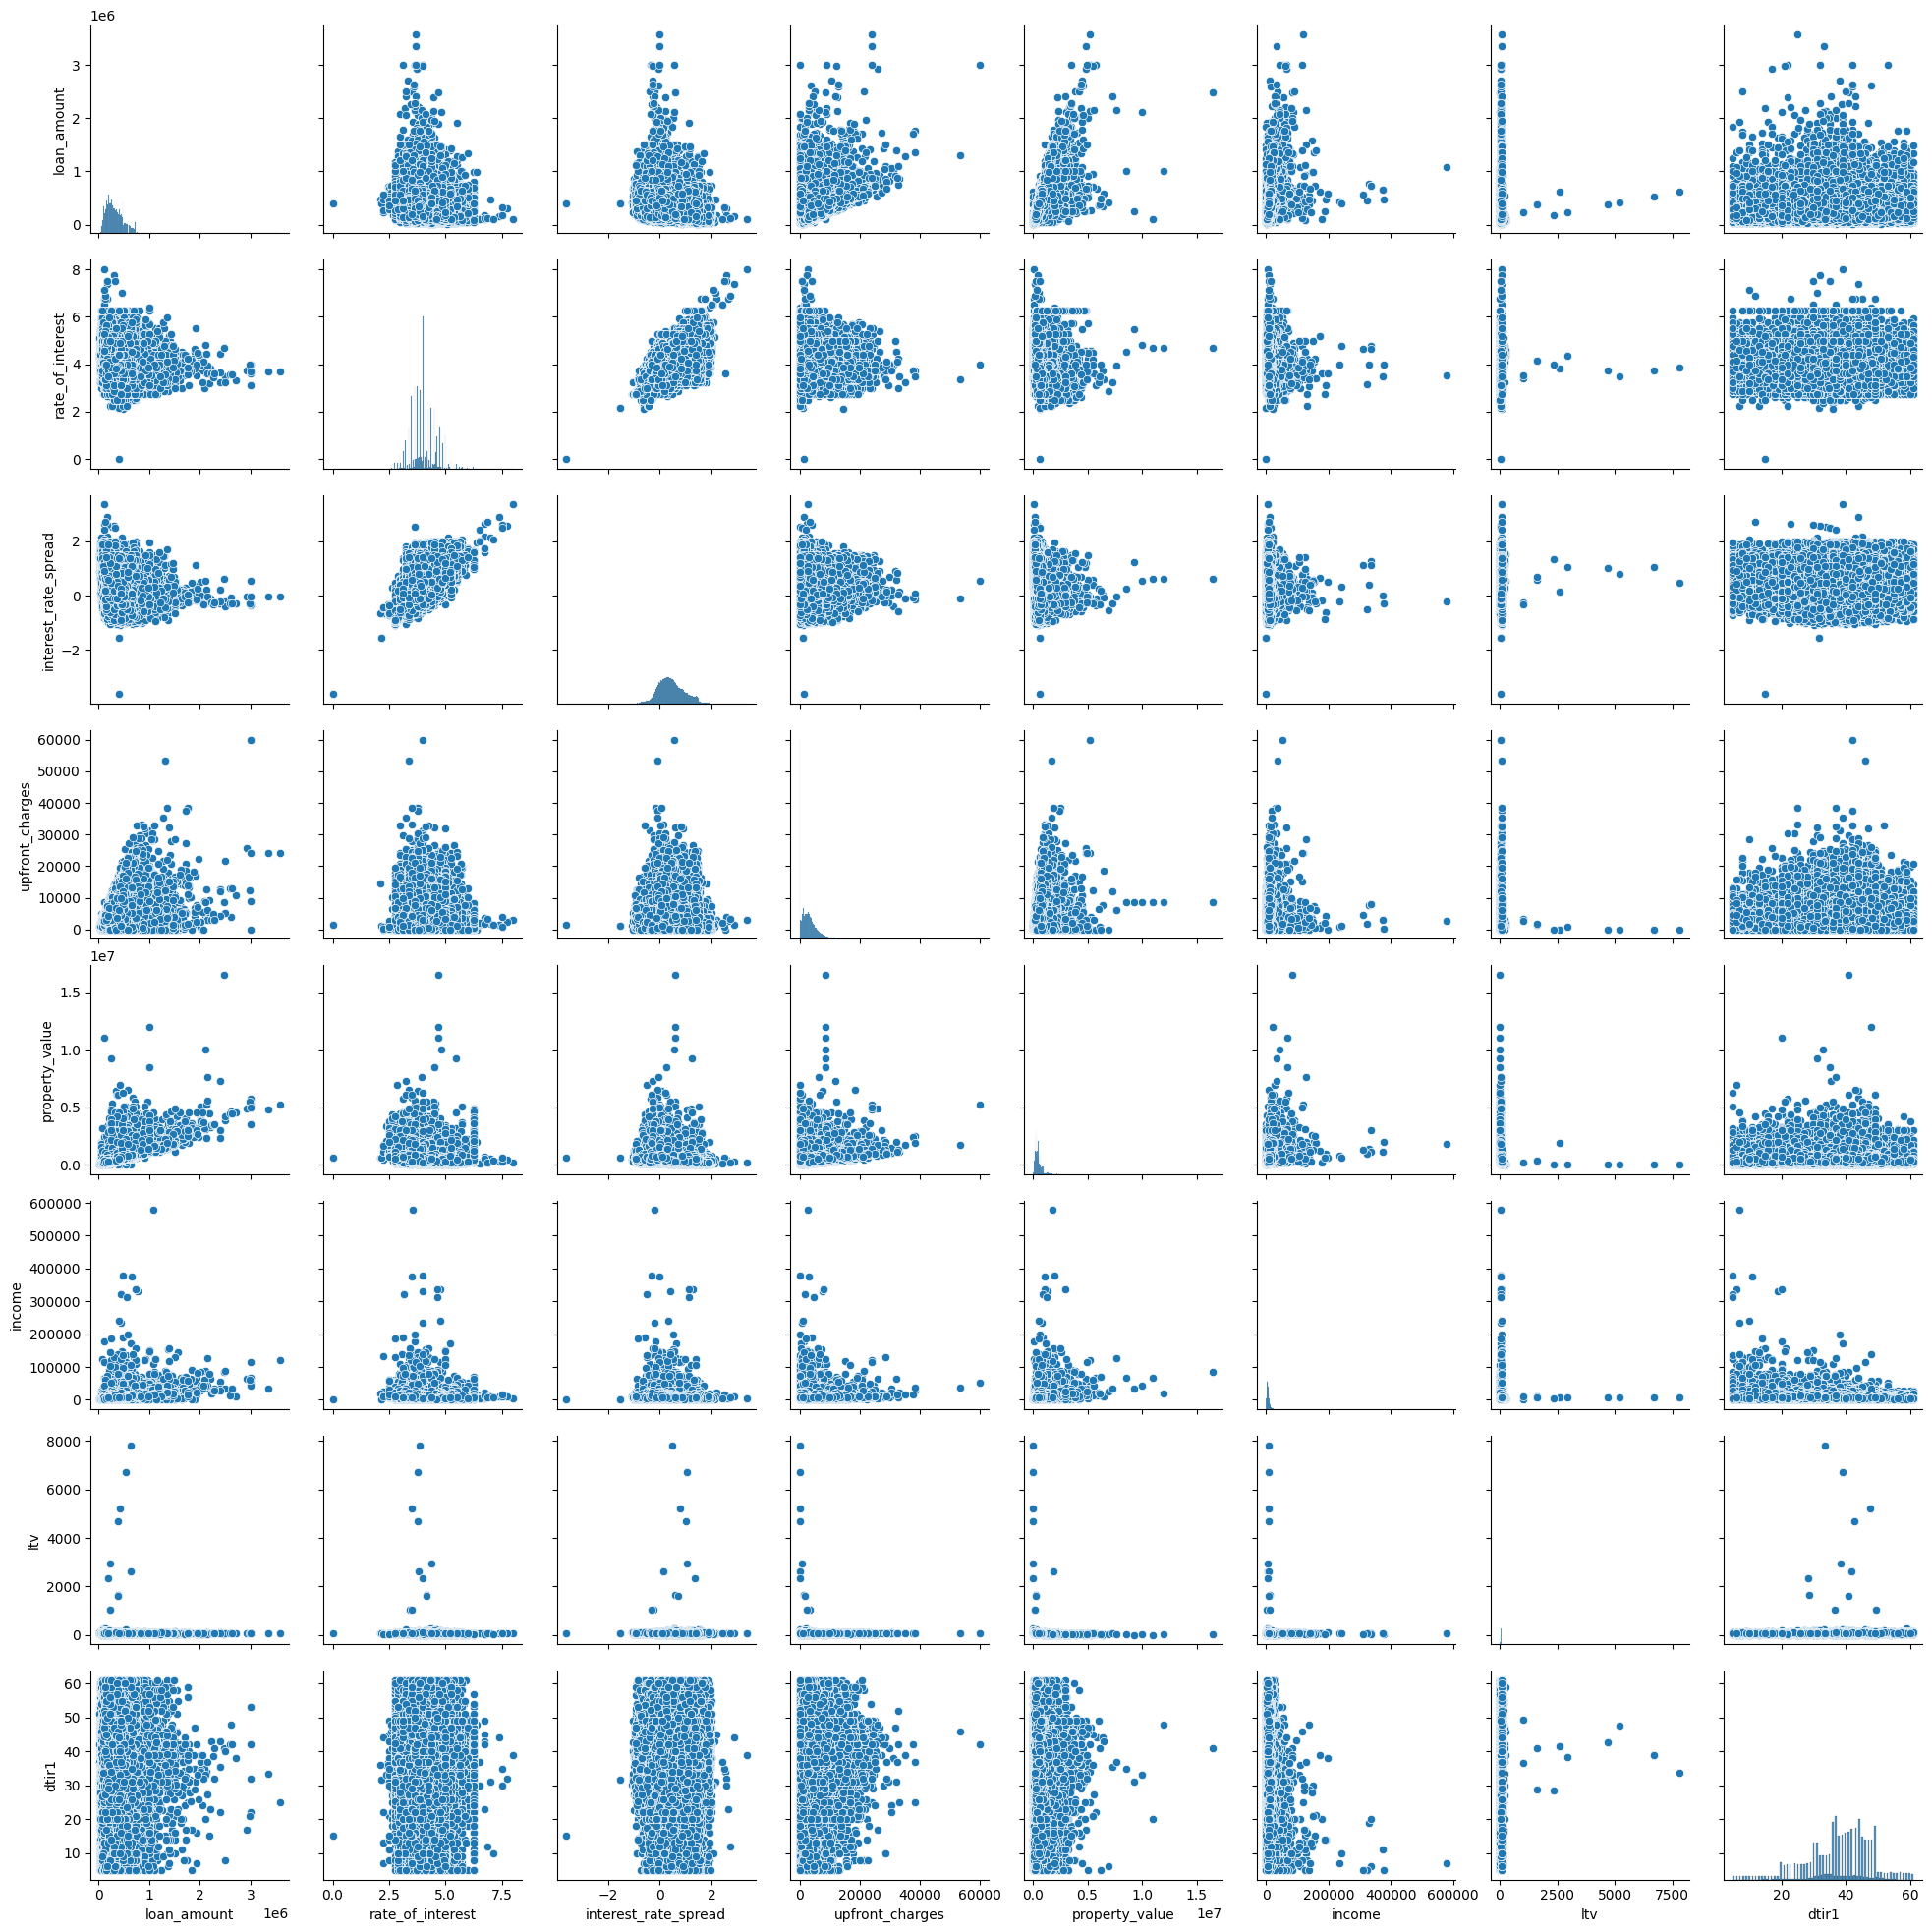

In [40]:
sns.pairplot(no_na_df[['loan_amount', 'rate_of_interest','interest_rate_spread','upfront_charges','property_value','income','ltv','dtir1']])

To look at the distribution of data

C:\Users\Justin\AppData\Local\Temp\ipykernel_20200\4290396018.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  no_na_df.loc[:, ~no_na_df.columns.isin(['id','year','term','credit_score'])].hist(ax=ax)


array([[<Axes: title={'center': 'unnamed: 0'}>,
        <Axes: title={'center': 'loan_amount'}>,
        <Axes: title={'center': 'rate_of_interest'}>],
       [<Axes: title={'center': 'interest_rate_spread'}>,
        <Axes: title={'center': 'upfront_charges'}>,
        <Axes: title={'center': 'property_value'}>],
       [<Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'ltv'}>,
        <Axes: title={'center': 'status'}>],
       [<Axes: title={'center': 'dtir1'}>, <Axes: >, <Axes: >]],
      dtype=object)

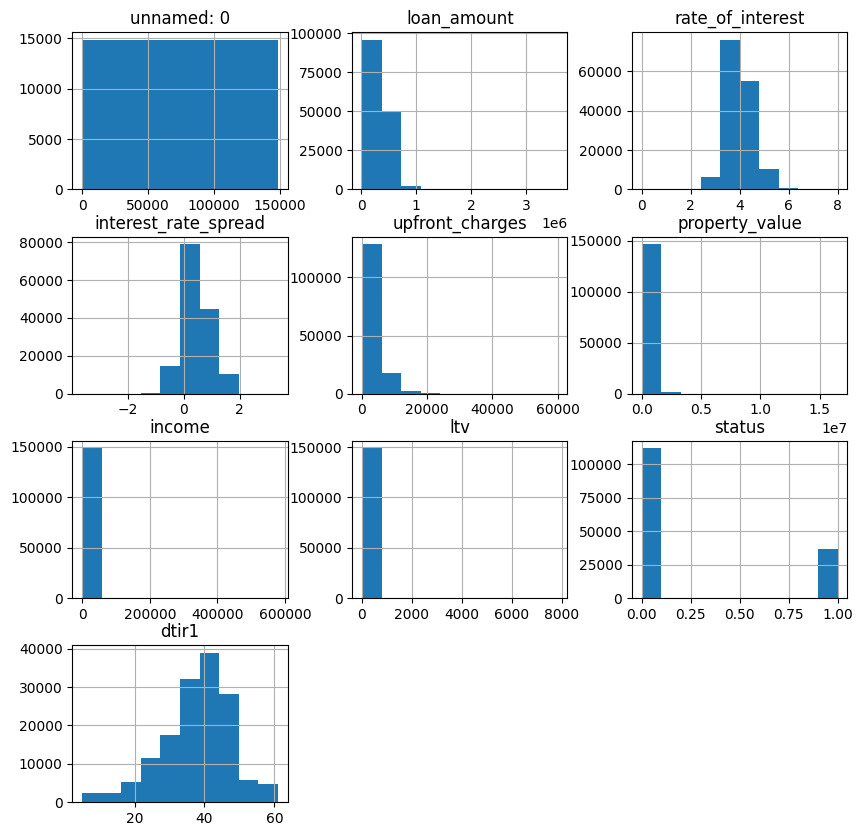

In [41]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()

no_na_df.loc[:, ~no_na_df.columns.isin(['id','year','term','credit_score'])].hist(ax=ax)

<Axes: xlabel='credit_type', ylabel='count'>

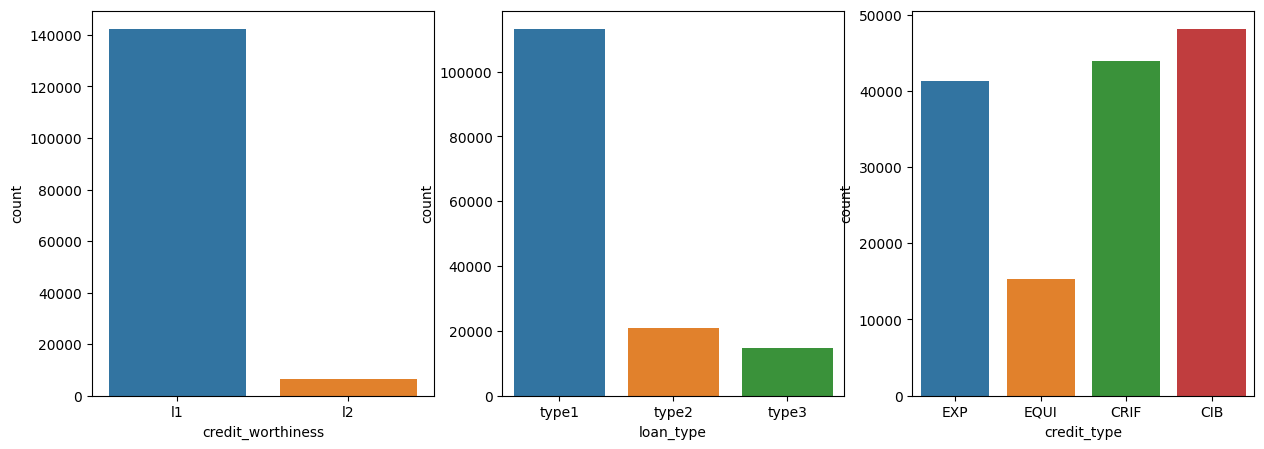

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

sns.countplot(ax=axes[0], data=no_na_df, x='credit_worthiness')
sns.countplot(ax=axes[1],data=no_na_df, x='loan_type')
sns.countplot(ax=axes[2],data=no_na_df, x='credit_type')

<Axes: xlabel='status', ylabel='ltv'>

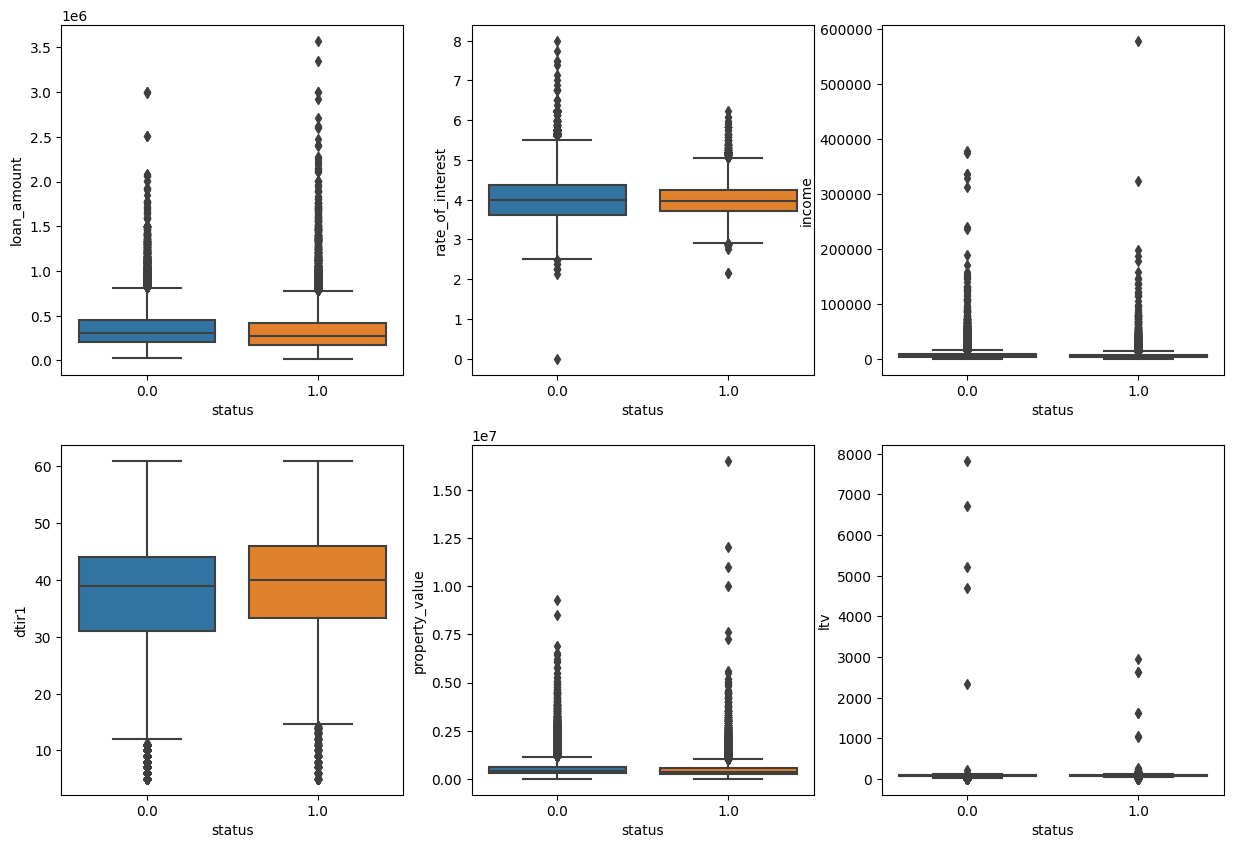

In [43]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

sns.boxplot(ax=axes[0,0],data=no_na_df, x='status', y='loan_amount')
sns.boxplot(ax=axes[0,1], data=no_na_df, x='status', y='rate_of_interest')
sns.boxplot(ax=axes[0,2],data=no_na_df, x='status', y='income')
sns.boxplot(ax=axes[1,0],data=no_na_df, x='status', y='dtir1')
sns.boxplot(ax=axes[1,1],data=no_na_df, x='status', y='property_value')
sns.boxplot(ax=axes[1,2],data=no_na_df, x='status', y='ltv')

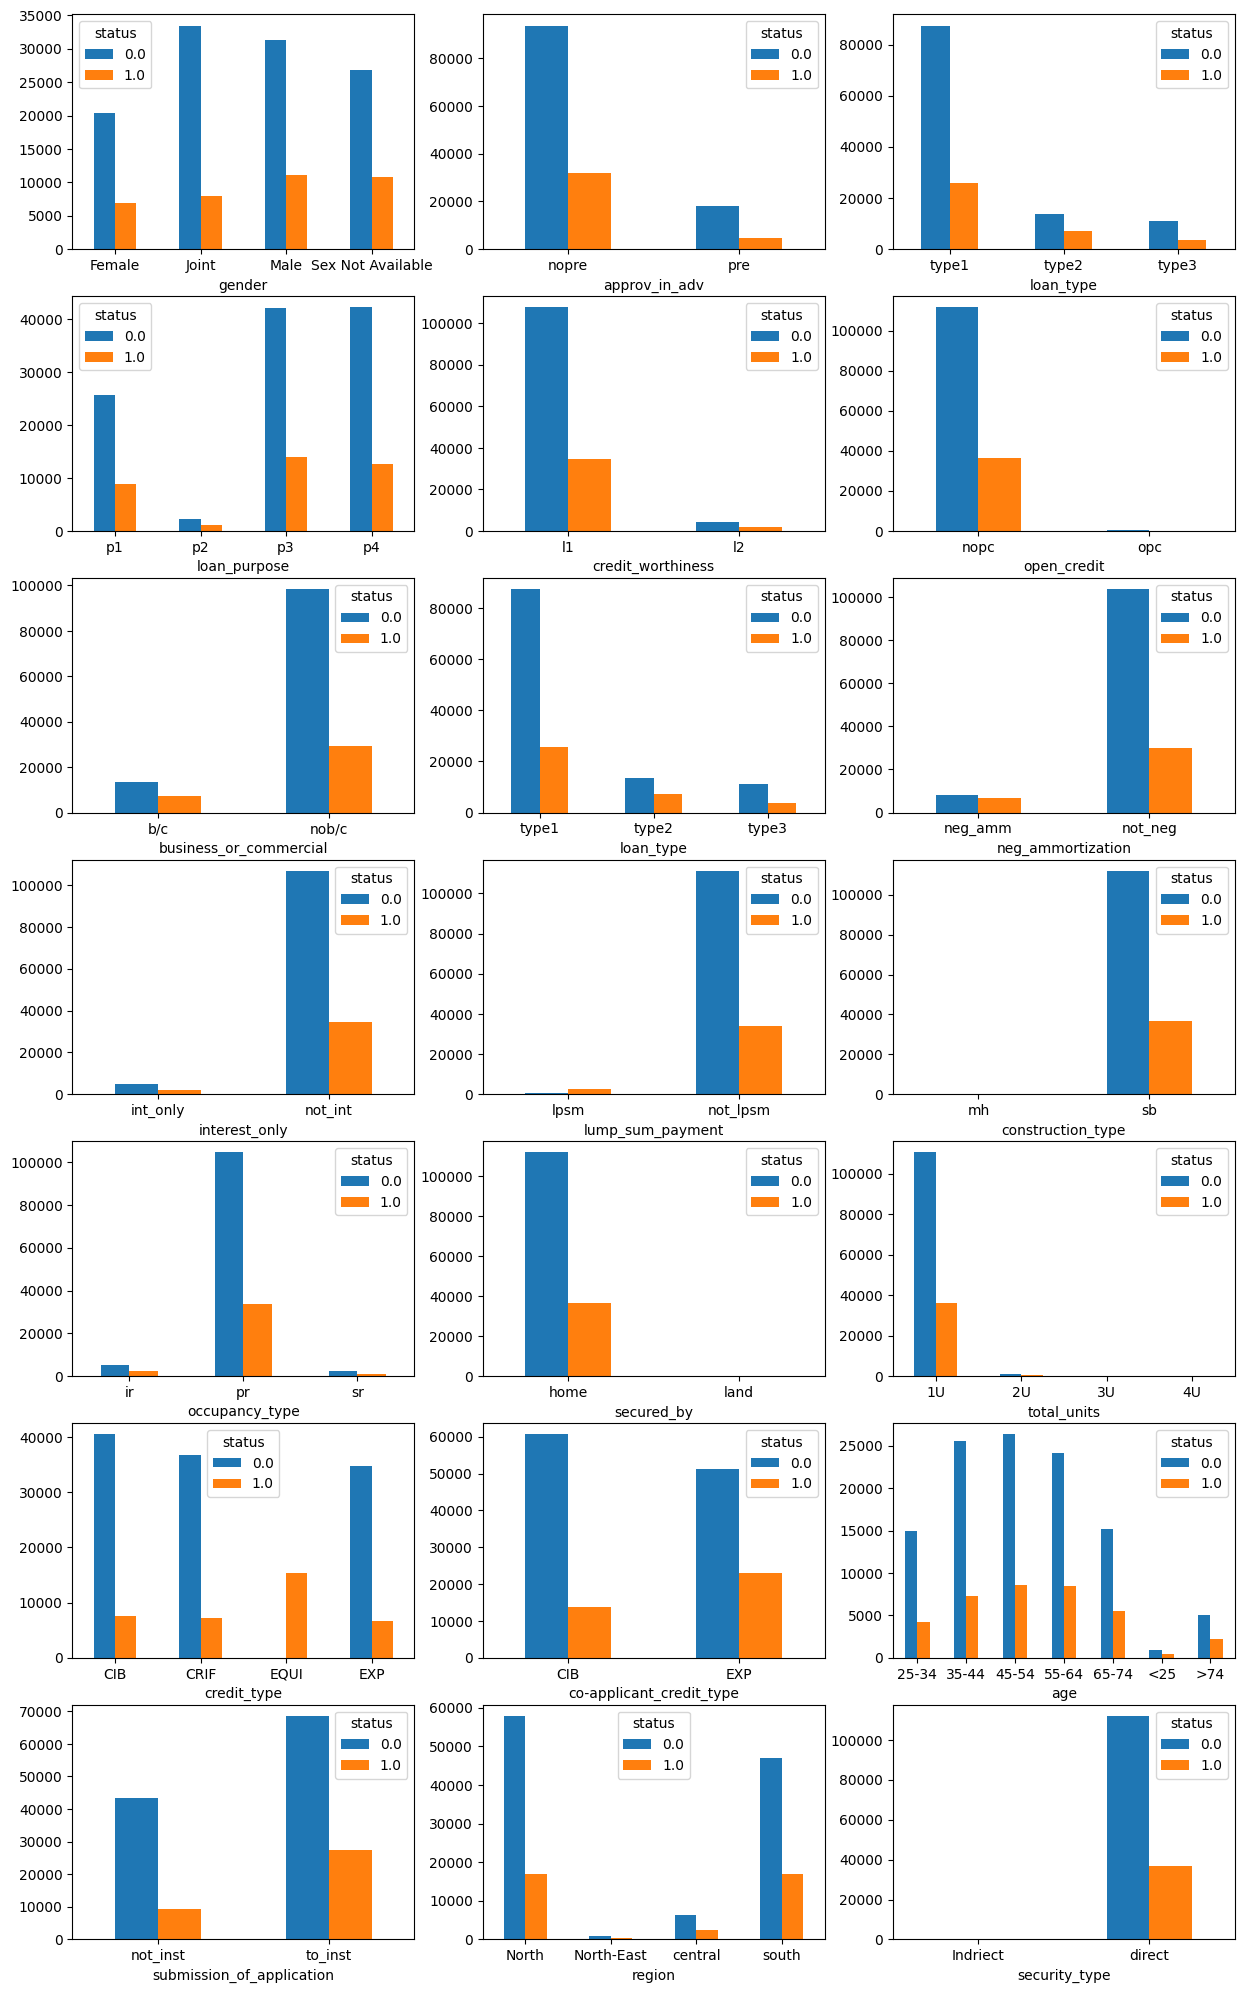

In [45]:
# Categorical variables to loan status
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(15,25))


categorical_variables = ["gender", "approv_in_adv", "loan_type","loan_purpose","credit_worthiness","open_credit","business_or_commercial","loan_type","neg_ammortization","interest_only","lump_sum_payment","construction_type","occupancy_type","secured_by","total_units","credit_type","co-applicant_credit_type","age","submission_of_application","region","security_type"]

i = 0;
while i < 21:
    for row in range(7):
        for col in range(3):
            no_na_df.groupby([categorical_variables[i], "status"]).size().unstack().plot(kind="bar", ax=axes[row,col])
            axes[row, col].tick_params(axis='x', rotation=360)
            i += 1